In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
red_wine   = pd.read_csv('/home/ashish/Desktop/winequality-red.csv',   sep=';')
white_wine = pd.read_csv('/home/ashish/Desktop/winequality-white.csv', sep=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Feature Engineering

### Create new attributes with hand-engineered features.

#### Add New Attribute wine_type

In [5]:
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

In [6]:
red_wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Add New Attributes quality_label

#### First, let's take a peek at all the unique values of the attribute quality.

In [7]:
print('red_wine\'s list of "quality":\t', sorted(red_wine['quality'].unique()))
print('white_wine\'s list of "quality":\t', sorted(red_wine['quality'].unique()))

red_wine's list of "quality":	 [3, 4, 5, 6, 7, 8]
white_wine's list of "quality":	 [3, 4, 5, 6, 7, 8]


### Bucket quality (numerical) scores into a new (categorical) attribute called quality_label:

    low: value ≤ 5
    medium: 5 < value ≤ 7
    high: value > 7
    
### In addition, we'll convert quality_label into a Categorical data type by using pd.Categorical().


In [8]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

In [9]:
red_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low


In [10]:
white_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,white,medium


In [11]:
# Preview `value_counts()` of the `quality_label` attribute:

print(red_wine['quality_label'].value_counts())
print()
print(white_wine['quality_label'].value_counts())

medium    837
low       744
high       18
Name: quality_label, dtype: int64

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64


## Merge red and white wine datasets with pd.concat():

In [12]:
wines = pd.concat([red_wine, white_wine], axis=0,)

# Re-shuffle records just to randomize data points.
# `drop=True`: this resets the index to the default integer index.

wines = wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


# 3. Exploratory Data Analysis

## Applying "Descriptive Statistics" using describe() on a subset of attributes:

In [13]:
subset_attributes = ['residual sugar',        #1
                     'total sulfur dioxide',  #2
                     'sulphates',             #3
                     'alcohol',               #4
                     'volatile acidity',      #5
                     'quality']               #6

In [14]:
rs = round(red_wine[subset_attributes].describe(), 2)
rs

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,2.54,46.47,0.66,10.42,0.53,5.64
std,1.41,32.90,0.17,1.07,0.18,0.81
min,0.90,6.00,0.33,8.40,0.12,3.00
25%,1.90,22.00,0.55,9.50,0.39,5.00
50%,2.20,38.00,0.62,10.20,0.52,6.00
75%,2.60,62.00,0.73,11.10,0.64,6.00
max,15.50,289.00,2.00,14.90,1.58,8.00


In [15]:
ws = round(white_wine[subset_attributes].describe(), 2)
ws

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.39,138.36,0.49,10.51,0.28,5.88
std,5.07,42.50,0.11,1.23,0.10,0.89
min,0.60,9.00,0.22,8.00,0.08,3.00
25%,1.70,108.00,0.41,9.50,0.21,5.00
50%,5.20,134.00,0.47,10.40,0.26,6.00
75%,9.90,167.00,0.55,11.40,0.32,6.00
max,65.80,440.00,1.08,14.20,1.10,9.00


## Using the keys parameter in pd.concat() to seperate red/white wine statistics:

In [16]:
pd.concat([rs, ws], axis=1, 
          keys=['🔴 Red Wine Statistics', 
                '⚪️ White Wine Statistics'])

🔴 Red Wine Statistics                                          \
             residual sugar total sulfur dioxide sulphates  alcohol   
count               1599.00              1599.00   1599.00  1599.00   
mean                   2.54                46.47      0.66    10.42   
std                    1.41                32.90      0.17     1.07   
min                    0.90                 6.00      0.33     8.40   
25%                    1.90                22.00      0.55     9.50   
50%                    2.20                38.00      0.62    10.20   
75%                    2.60                62.00      0.73    11.10   
max                   15.50               289.00      2.00    14.90   

                                ⚪️ White Wine Statistics                       \
      volatile acidity  quality           residual sugar total sulfur dioxide   
count          1599.00  1599.00                  4898.00              4898.00   
mean              0.53     5.64                     6.39               138.36   
std               0.18     0.81                     5.07                42.50   
min               0.12     3.00                     0.60                 9.00   
25%               0.39     5.00                     1.70               108.00   
50%               0.52     6.00                     5.20               134.00   
75%               0.64     6.00                     9.90               167.00   
max               1.58     8.00                    65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

### Again, using the keys parameter in pd.concat() to seperate based on wine quality:

In [17]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']

ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)

pd.concat([ls, ms, hs], axis=1, 
          keys=['👎 Low Quality Wine', 
                '👌 Medium Quality Wine', 
                '👍 High Quality Wine'])

👎 Low Quality Wine                                     \
                 alcohol volatile acidity       pH  quality   
count            2384.00          2384.00  2384.00  2384.00   
mean                9.87             0.40     3.21     4.88   
std                 0.84             0.19     0.16     0.36   
min                 8.00             0.10     2.74     3.00   
25%                 9.30             0.26     3.11     5.00   
50%                 9.60             0.34     3.20     5.00   
75%                10.40             0.50     3.31     5.00   
max                14.90             1.58     3.90     5.00   

      👌 Medium Quality Wine                                     \
                    alcohol volatile acidity       pH  quality   
count               3915.00          3915.00  3915.00  3915.00   
mean                  10.81             0.31     3.22     6.28   
std                    1.20             0.14     0.16     0.45   
min                    8.40             0.08     2.72     6.00   
25%                    9.80             0.21     3.11     6.00   
50%                   10.80             0.27     3.21     6.00   
75%                   11.70             0.36     3.33     7.00   
max                   14.20             1.04     4.01     7.00   

      👍 High Quality Wine                                   
                  alcohol volatile acidity      pH quality  
count              198.00           198.00  198.00  198.00  
mean                11.69             0.29    3.23    8.03  
std                  1.27             0.12    0.16    0.16  
min                  8.50             0.12    2.88    8.00  
25%                 11.00             0.21    3.13    8.00  
50%                 12.00             0.28    3.23    8.00  
75%                 12.60             0.35    3.33    8.00  
max                 14.00             0.85    3.72    9.00

It’s quite easy to contrast and compare these statistical measures for the different types of wine samples.

Do you notice the stark difference in some of the attributes?

We'll emphasize those in some of our visualizations later on.

# 1D: Univariate Analysis

Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute (or variable) and visualizing the same (one dimension).

One of the quickest and most effective ways to visualize all numeric data and their distributions, is to leverage histograms using pandas.

The plots below give a good idea about the basic data distribution of each attribute (e.g. alcohol, chlorides, citric acid, etc.).

####  Note: There are 2 attributes — wine_type and quality_label — that are not plotted. Do you know why? 🤔


In [18]:
wines.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
quality_label           category
dtype: object

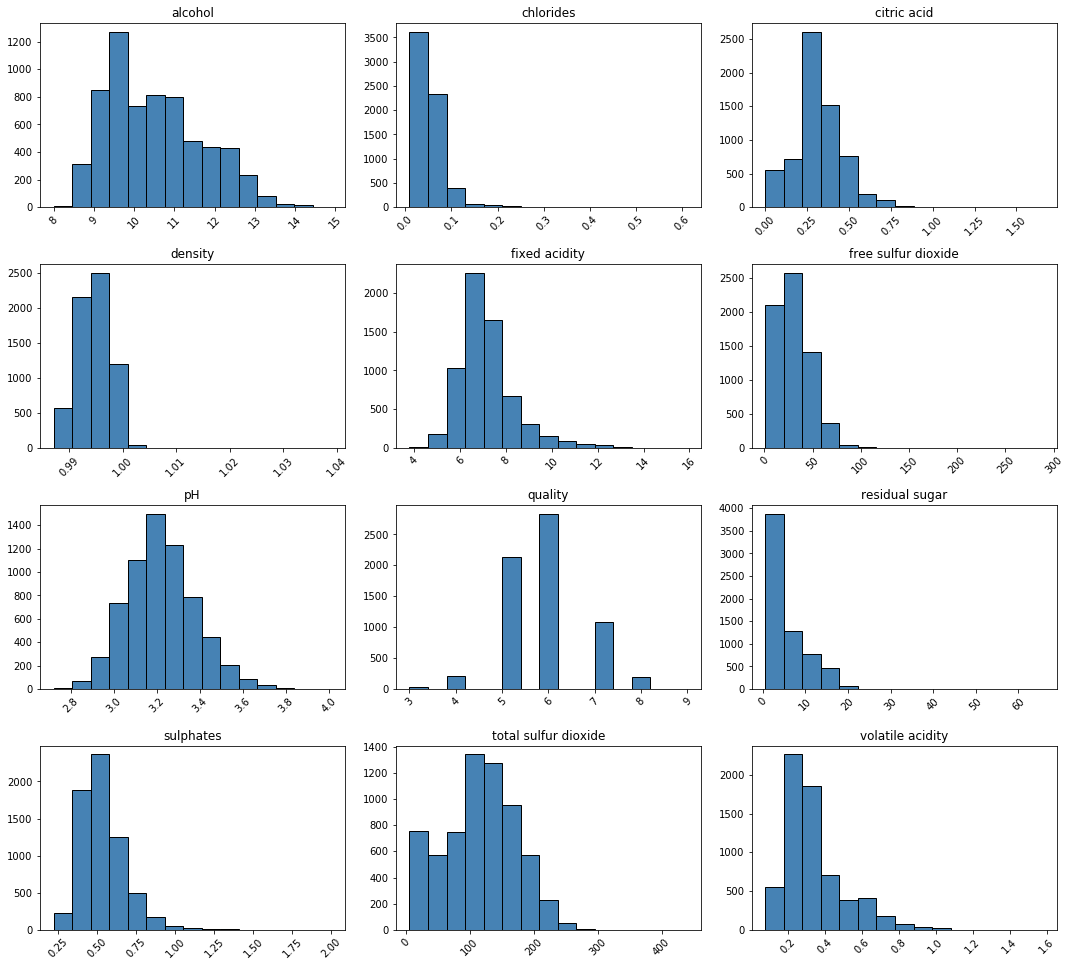

In [19]:
fig = wines.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

# 1D: Continuous Numeric Attribute

Let’s drill down to visualizing one of the continuous, numeric attributes — sulphates.

Essentially a histogram or a density plot works quite well in understanding how the data is distributed for that attribute.

#                                                  Histogram

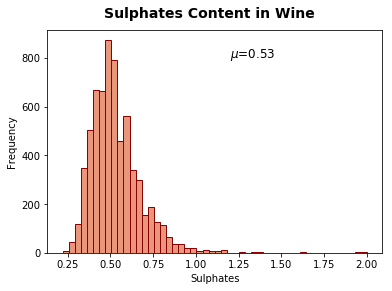

In [20]:
# Prepare the figure

fig = plt.figure( figsize=(6,4) )
title = fig.suptitle("Sulphates Content in Wine", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

# Prepare a subplot
ax = fig.add_subplot(1,1,1) # More info: https://youtu.be/afITiFR6vfw?t=1m53s
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")

# Add text into the subplot
ax.text(x=1.2, 
        y=800, 
        s=r'$\mu$='+str(round(wines['sulphates'].mean(), 2)), 
        fontsize=12)

freq, bins, patches = ax.hist(wines['sulphates'], 
                              bins=50,
                              color='darksalmon', 
                              edgecolor='darkred', linewidth=1.0)

# Density Plot

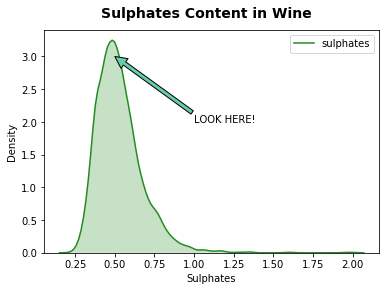

In [21]:
# Prepare the figure
fig = plt.figure( figsize=(6,4) )
title = fig.suptitle("Sulphates Content in Wine", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

# Prepare a subplot
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 

# Annotate: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html
ax1.annotate('LOOK HERE!', 
             xy=(0.5, 3), 
             xytext=(1.0, 2.0),
             arrowprops=dict(facecolor='mediumaquamarine')) 

# Seaborn time!
sns.kdeplot(wines['sulphates'], 
            ax=ax1, 
            shade=True, 
            color='forestgreen')

# Side-by-side: Histogram + Density Plot

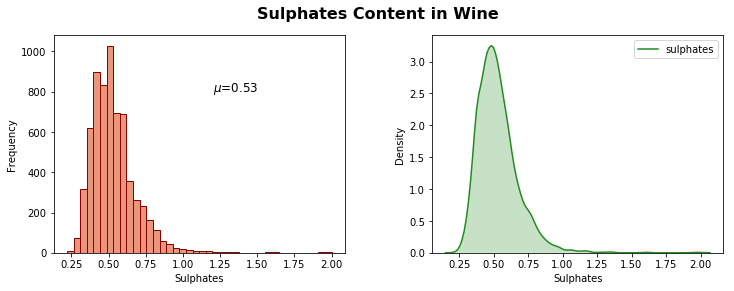

In [22]:
fig = plt.figure( figsize=(12,4) )
title = fig.suptitle("Sulphates Content in Wine", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

#===========#
# Histogram #
#===========#
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")

ax1.text(x=1.2, y=800, 
         s=r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)

freq, bins, patches = ax1.hist(wines['sulphates'], 
                               bins=40,
                               color='darksalmon',
                               edgecolor='darkred', linewidth=1)

#==============#
# Density Plot #
#==============#
ax2 = fig.add_subplot(1,2,2) 
#ax2 = ax1.twinx() # https://youtu.be/OebyvmZo3w0?t=1m42s
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(wines['sulphates'], ax=ax2, shade=True, color='forestgreen')

#=============#
# Save Figure #
#=============#
# fig.savefig('suplhates_content_in_wine_side-by-side.jpg')

# Merging above two graphs into one

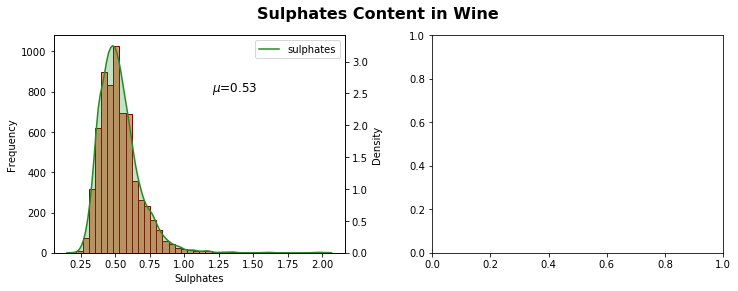

In [23]:
fig = plt.figure( figsize=(12,4) )
title = fig.suptitle("Sulphates Content in Wine", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

#===========#
# Histogram #
#===========#
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")

ax1.text(x=1.2, y=800, 
         s=r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)

freq, bins, patches = ax1.hist(wines['sulphates'], 
                               bins=40,
                               color='darksalmon',
                               edgecolor='darkred', linewidth=1)

#==============#
# Density Plot #
#==============#
ax2 = fig.add_subplot(1,2,2) 
ax2 = ax1.twinx() # https://youtu.be/OebyvmZo3w0?t=1m42s
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(wines['sulphates'], ax=ax2, shade=True, color='forestgreen')

#=============#
# Save Figure #
#=============#
# fig.savefig('suplhates_content_in_wine_side-by-side.jpg')

# 1D: Discrete Categorical Attribute

In [24]:
wines.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
quality_label           category
dtype: object

In [25]:
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))

print( w_q[0] )
print( w_q[1] )

[6, 5, 7, 4, 8, 3, 9]
[2836, 2138, 1079, 216, 193, 30, 5]


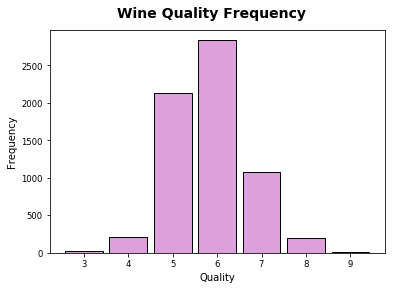

In [26]:
fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.9, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
ax.tick_params(axis='both', which='major', labelsize=8.5)

bar = ax.bar(w_q[0],   # i.e. [6, 5, 7, 4, 8, 3, 9]
             w_q[1], # i.e. [2836, 2138, 1079, 216, 193, 30, 5]
             width=0.85,
             color='plum', 
             edgecolor='black', linewidth=1)

# 2D: Visualizing Data in Two Dimensions

One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix and depict it as a heatmap.


# 2D: Heatmap on Correlation Matrix

In [27]:
# Compute pairwise correlation of Dataframe's attributes
corr = wines.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


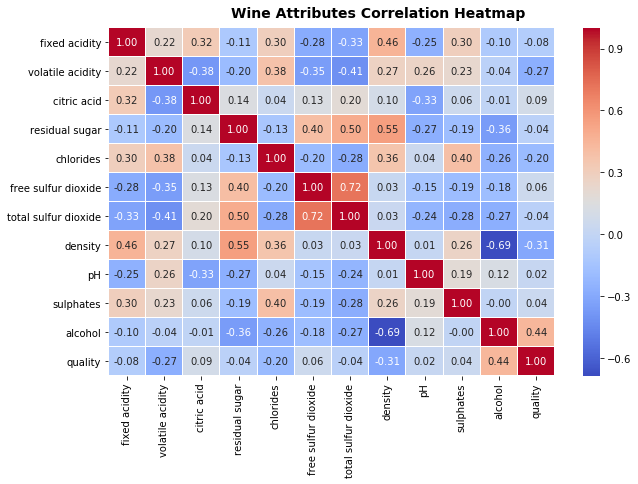

In [28]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Wine Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')


 *  The gradients in the heatmap vary based on the strength of the correlation.
 *  You can clearly see that it is very easy to spot potential attributes having strong correlations amongst themselves.

# 2D: Pair-Wise Scatter Plots

Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

 *   Note: The diagonal Axes are treated differently — by drawing a plot to show the univariate distribution of the data for the variable in that column.


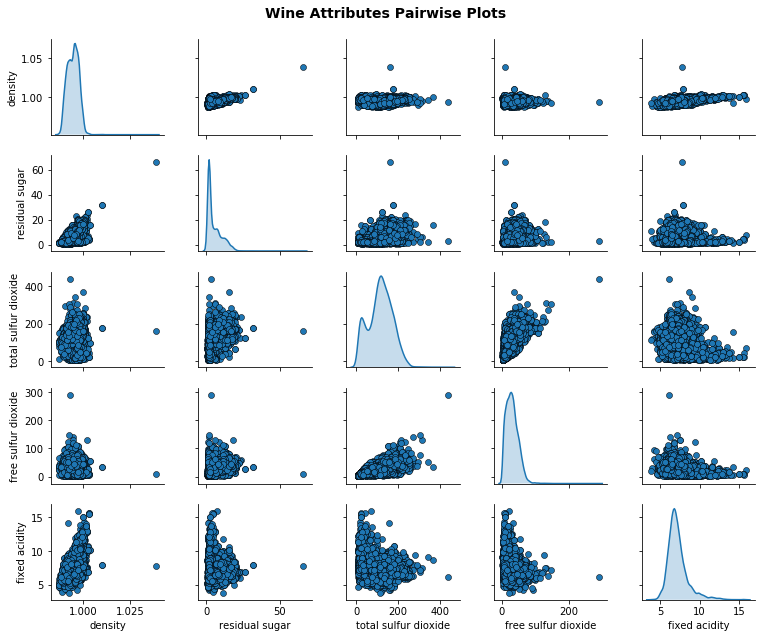

In [29]:
# Attributes of interest

cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'free sulfur dioxide', 
        'fixed acidity']

pp = sns.pairplot(wines[cols], 
                  size=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', 
              fontsize=14, fontweight='bold')

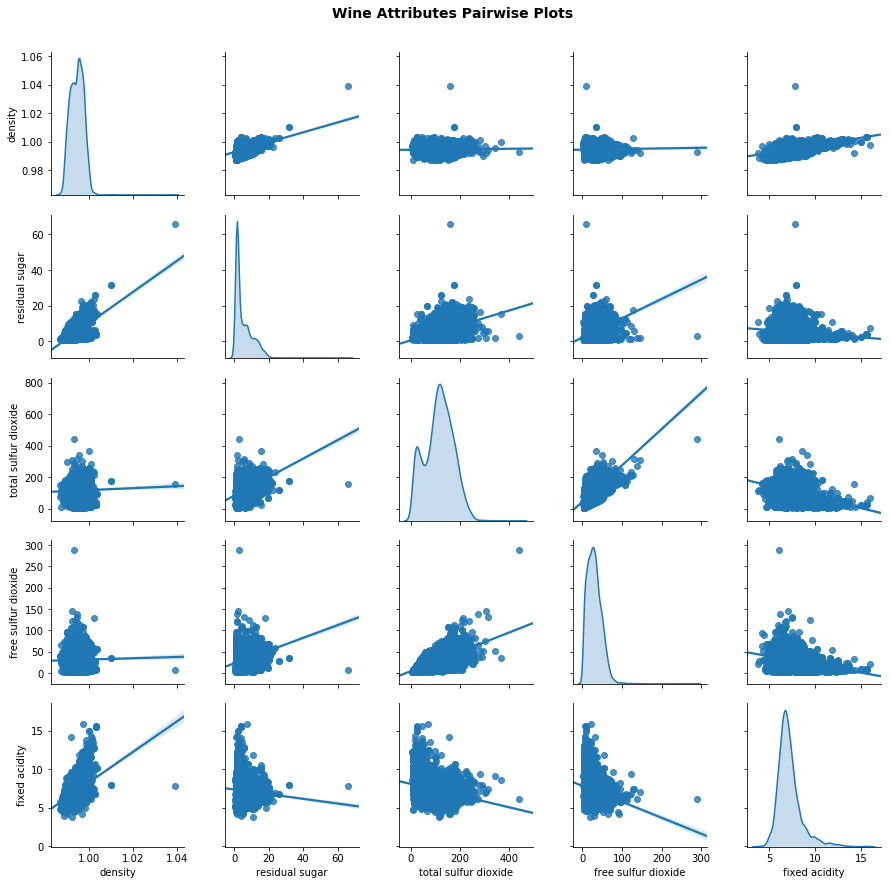

In [30]:
pp = sns.pairplot(wines[cols], 
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde", # use "kde" for diagonal plots
                  kind="reg")# <== 😀 linear regression to the scatter plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14, fontweight='bold')

*  Based on the above plot, you can see that scatter plots are also a decent way of observing potential relationships or patterns in two-dimensions for data attributes.

# 2D: Parallel Coordinates

### Another way of visualizing multivariate data for multiple attributes together (or concurrently) is to use parallel coordinates.



 *   Important: Before we proceed to run parallel_coordinates(), we'll need to scale our data first, as different attributes are measured on different scales.

We'll be using StandardScaler in sklearn.preprocessing to do the job.

 *   Note: I have another blog post on Feature Scaling (should you be interested to know more).


In [31]:
# Attributes of interest

cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'free sulfur dioxide', 
        'fixed acidity']

subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

,density,residual sugar,total sulfur dioxide,free sulfur dioxide,fixed acidity,wine_type
0,-0.165631,1.546371,0.181456,-0.367664,-0.166089,white
1,0.301278,-0.681719,0.305311,0.083090,0.373895,red
2,-0.859324,0.411306,0.305311,0.421155,-0.320370,white
3,0.408001,1.210056,1.189993,1.717074,-0.706073,white
4,1.395180,1.777588,2.003900,1.829762,0.142473,white


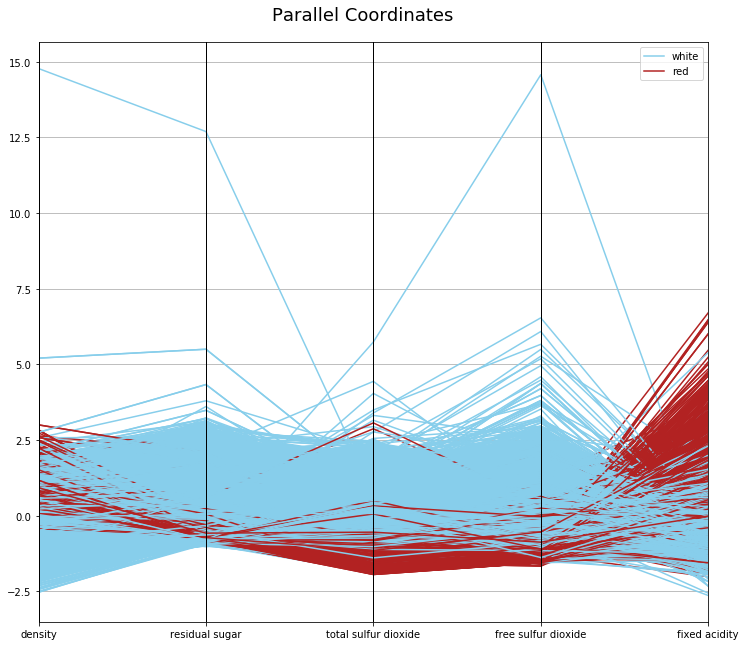

In [32]:
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(final_df, 
                          'wine_type', 
                          color=('skyblue', 'firebrick'))

Basically, in this visualization as depicted above, points are represented as connected line segments.

  *  Each vertical line represents one data attribute (e.g. residual sugar).
  * One complete set of connected line segments across all the attributes represents one data point.
  *  Hence points that tend to cluster will appear closer together.

Just by looking at it, we can clearly see that density is slightly more for red wines as compared to white — since there are more red lines clustered above the white ones.

Also residual sugar and total sulfur dioxide are higher for white wines as compared to red, while fixed acidity is higher for red wines as compared to white.

  * Note: If you don't perform scaling beforehand, this is what you'll get:


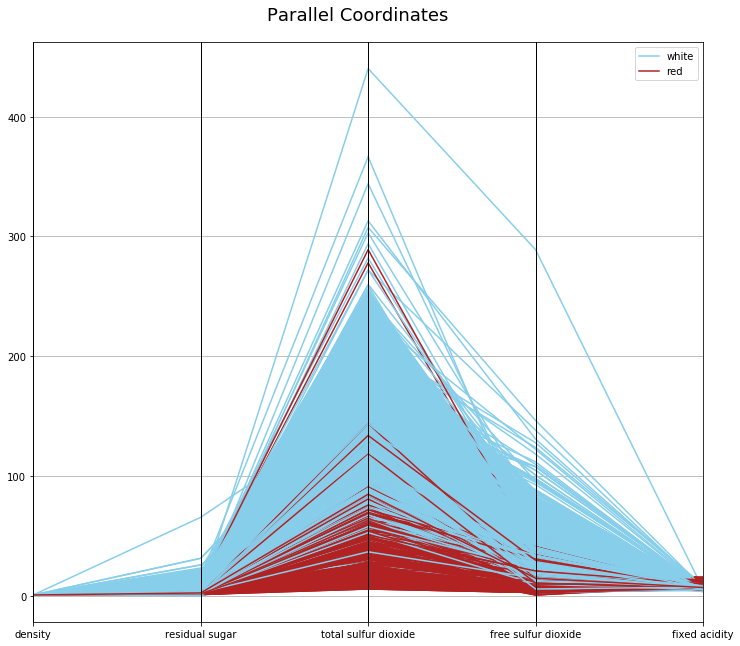

In [33]:
# If you don't perform scaling beforehand, this is what you'll get:

fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

new_cols = ['density', 'residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'fixed acidity', 'wine_type']
pc = parallel_coordinates(wines[new_cols], 
                          'wine_type', 
                          color=('skyblue', 'firebrick'))

# 2D: Two Continuous Numeric Attributes

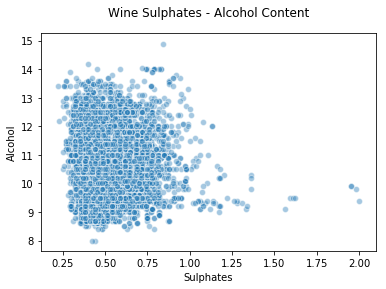

In [34]:
plt.scatter(wines['sulphates'], 
            wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content', y=1.05)

[💚] The better alternative — using Seaborn's jointplot():

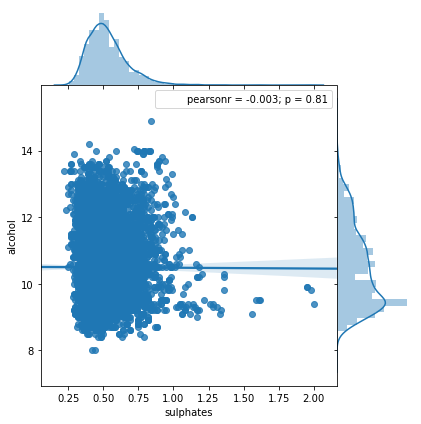

In [35]:
jp = sns.jointplot(data=wines,
                   x='sulphates', 
                   y='alcohol', 
                   kind='reg', # <== 😀 Add regression and kernel density fits
                   space=0, size=6, ratio=4)

😀 Replace the scatterplot with a joint histogram using hexagonal bins:

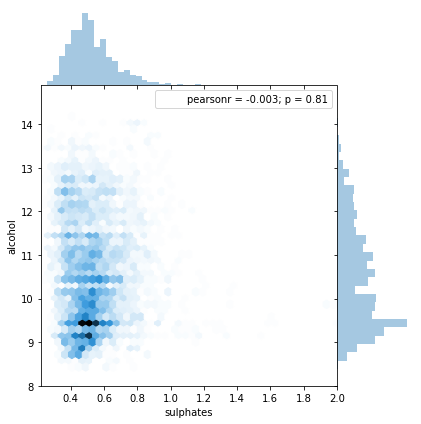

In [36]:
jp = sns.jointplot(data=wines,
                   x='sulphates', 
                   y='alcohol', 
                   kind='hex', # <== 😀 Replace the scatterplot with a joint histogram using hexagonal bins
                   space=0, size=6, ratio=4)

# 😀 KDE:

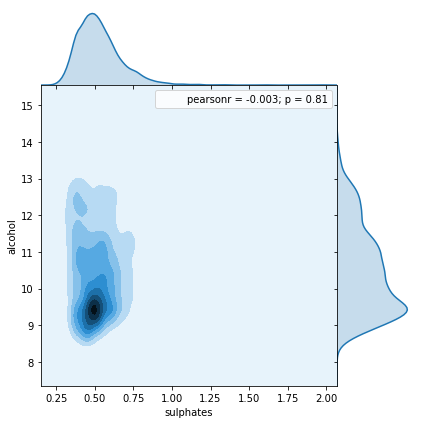

In [37]:
jp = sns.jointplot(data=wines,
                   x='sulphates', 
                   y='alcohol', 
                   kind='kde', # <== 😀 KDE
                   space=0, size=6, ratio=4)

# 2D: Two Discrete Categorical Attributes [📊]

Now that we've covered two continuous numeric attributes, how about visualizing two discrete, categorical attributes?

One way is to leverage separate subplots or facets for one of the categorical dimensions.

[💔] The traditional way — using matplotlib:

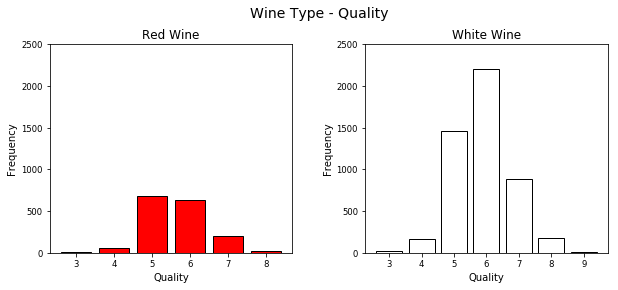

In [38]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0,2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0,2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
               edgecolor='black', linewidth=1)

While the above is a good way to visualize categorical data, as you can see, leveraging matplotlib has resulted in writing a lot of code 😤.

[💚] The better alternative — using Seaborn's countplot():

In addition, another good way is to use stacked bars or multiple bars for the different attributes in a single plot. We can leverage seaborn for the same easily.

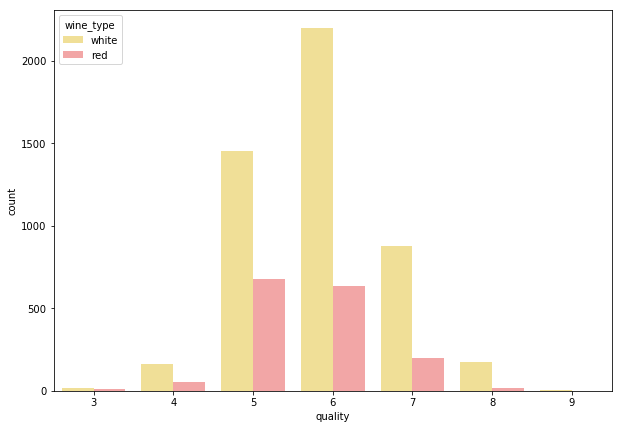

In [39]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=wines, 
                   x="quality", 
                   hue="wine_type", 
                   palette={"red": "#FF9999", "white": "#FFE888"})

This definitely looks cleaner and you can also effectively compare the different categories easily from this single plot.

# 2D: Mixed Attributes [📈+📊]

Let’s look at visualizing mixed attributes in 2-D (essentially numeric and categorical together).

One way is to use faceting/subplots along with generic histograms or density plots.

[💔] Again, let's first look at the traditional way — using matplotlib (histograms):

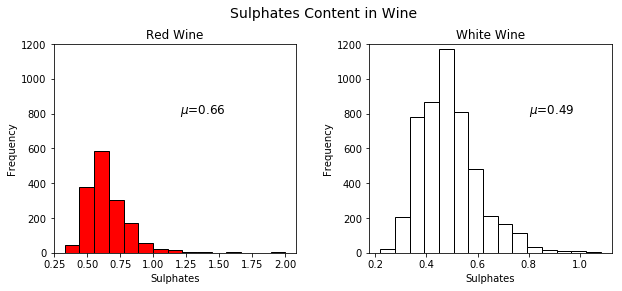

In [40]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                     edgecolor='black', linewidth=1)

[💔] Using matplotlib (density plots):

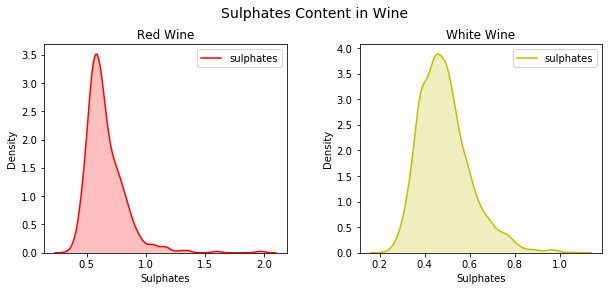

In [41]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

While this is good, once again we have a lot of boilerplate code which we can avoid by leveraging seaborn and even depict the plots in one single chart.

[💚] The better alternative — using Seaborn's FacetGrid():



The FacetGrid is an object that links a Pandas DataFrame to a matplotlib figure with a particular structure.

In particular, FacetGrid is used to draw plots with multiple Axes where each Axes shows the same relationship conditioned on different levels of some variable. It's possible to condition on up to three variables by assigning variables to the rows and columns of the grid and using different colors for the plot elements.

     The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid. Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe().

    Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend. See the detailed code examples here for more information.


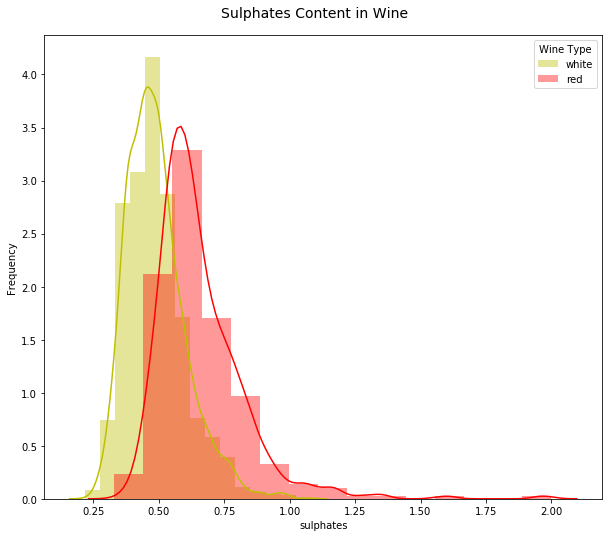

In [42]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=wines, 
                  hue='wine_type', 
                  palette={"red": "r", "white": "y"})

g.map(sns.distplot, 'sulphates', 
      kde=True, bins=15, ax=ax)

ax.legend(title='Wine Type')
plt.close(2)

You can see the plot generated above is clear and concise and we can easily compare across the distributions easily.

# 2D: Box [📦] and Violin [🎻] Plots

[📦] Box plots are another way of effectively depicting groups of numeric data based on the different values in the categorical attribute.

Additionally, box plots are a good way to know the quartile values in the data and also potential outliers.

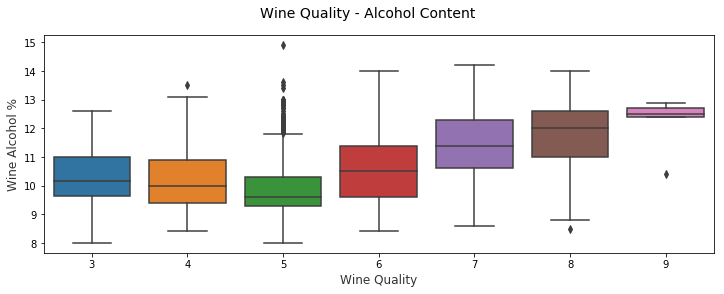

In [43]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(data=wines,  
            x="quality", 
            y="alcohol", 
            ax=ax)

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

[🎻] Another similar visualization is violin plots, which is also an effective way to visualize grouped numeric data using kernel density plots — depicting the probability density of the data at different values.

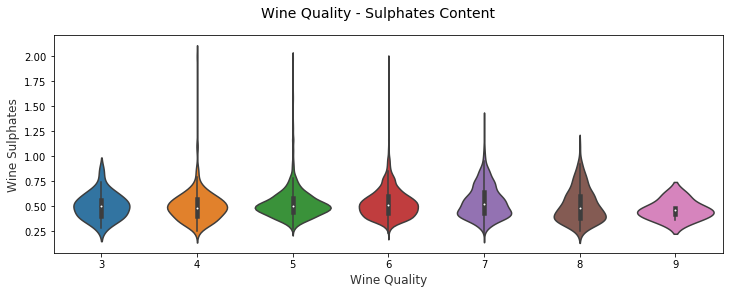

In [44]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(data=wines,
               x="quality", 
               y="sulphates",   
               ax=ax)

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size=12,alpha=0.8)

You can clearly see the density plots above for the different wine quality categories for wine sulphate.

# 3D: Visualizing Data in Three Dimensions

Visualizing data all the way to two dimensions is quite straightforward. But things start to become more complicated as the number of dimensions (or attributes) starts increasing. The reason being that we are often bounded by the two dimensions of our display mediums and our environment.

For 3D data, we can introduce a fake notion of depth by taking a z-axis in our chart or leveraging subplots and facets. However, for data higher than 3D, it becomes even more difficult to visualize with the same technique.

The best way to go higher than 3D is to use plot facets, color, shapes, sizes, depth and so on. You can also use time as a dimension by making an animated plot for other attributes over time.

For the following plot, we'll use color (i.e. hue) as the third dimension to represent wine_type.

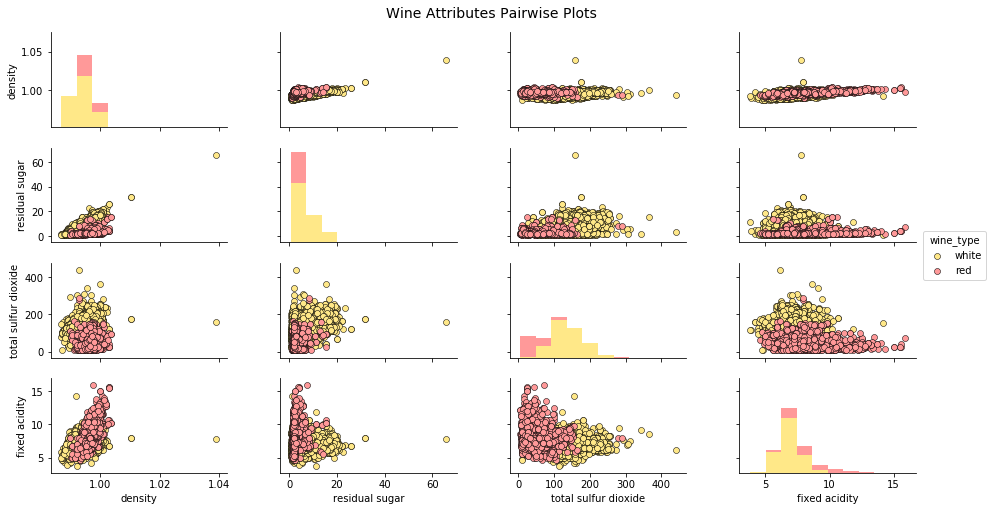

In [45]:
# Attributes of interest

cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'fixed acidity', 
        'wine_type']
        
pp = sns.pairplot(data=wines[cols], 
                  hue='wine_type', # <== 😀 Look here!
                  size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

# 3D: Three Continuous Numeric Attributes

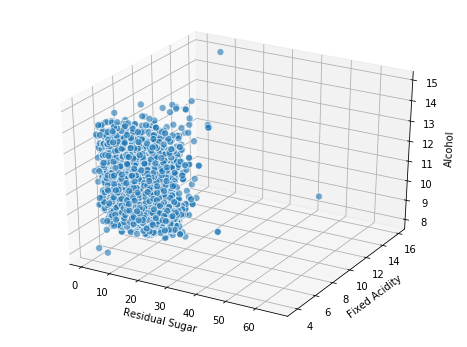

In [46]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

plt.show()

[💚] The better alternative — using Seaborn + toggle the size via the s parameter:

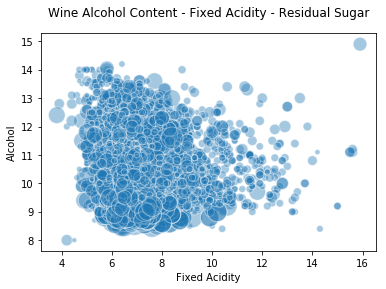

In [47]:
plt.scatter(x = wines['fixed acidity'], 
            y = wines['alcohol'], 
            s = wines['residual sugar']*25, # <== 😀 Look here!
            alpha=0.4, 
            edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar', y=1.05)

# 3D: Three Discrete Categorical Attributes

Using factorplot():


  1.  The attribute quality is represented via the x-axis.
  2.  The attribute wine_type is represented by the color.
  3.  The attribute quality_label is split into 3 columns — low, medium, and high.


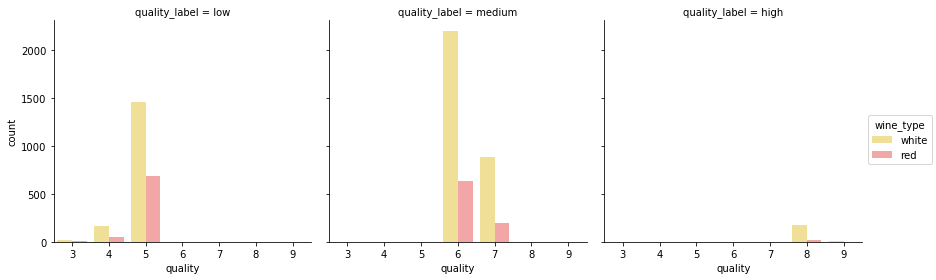

In [48]:
fc = sns.factorplot(x="quality", 
                    hue="wine_type", 
                    col="quality_label", # <== 😀 Look here!
                    data=wines, 
                    kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

# 3D Mixed Attributes (Numeric & Categorical)

Using sns.pairplot():


  1.  The attribute sulphates is represented via the x-axis.
  2.  The attribute alcohol is represented via the y-axis.
  3.  The attribute wine_type is represented by the color.


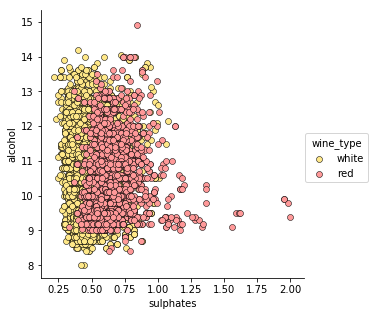

In [49]:
# Plot pairwise relationships in a dataset.

jp = sns.pairplot(data=wines, 
                  x_vars=["sulphates"], 
                  y_vars=["alcohol"], 
                  size=4.5,
                  hue="wine_type", # <== 😀 Look here!
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

Using sns.lmplot() to fit linear regression models to the scatter plots:

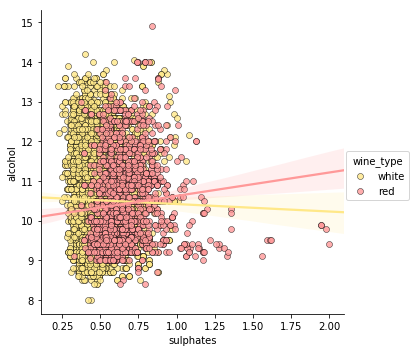

In [50]:
# Plot data and regression model fits across a FacetGrid.

lp = sns.lmplot(data=wines,
                x='sulphates', 
                y='alcohol', 
                hue='wine_type', # <== 😀 Look here!
                palette={"red": "#FF9999", "white": "#FFE888"},
                fit_reg=True, # <== 😀 Look here!
                legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))


Using sns.kdeplot():

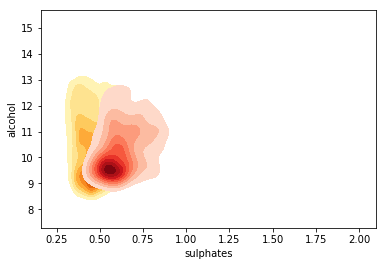

In [51]:
ax = sns.kdeplot(white_wine['sulphates'], # <== 😀 Look here!
                 white_wine['alcohol'],   # <== 😀 Look here!
                 cmap="YlOrBr", 
                 shade=True, shade_lowest=False)

ax = sns.kdeplot(red_wine['sulphates'], # <== 😀 Look here!
                 red_wine['alcohol'],   # <== 😀 Look here!
                 cmap="Reds", 
                 shade=True, shade_lowest=False)

For box plots [📦] and violin plots [🎻], we can split them based on wine_type:

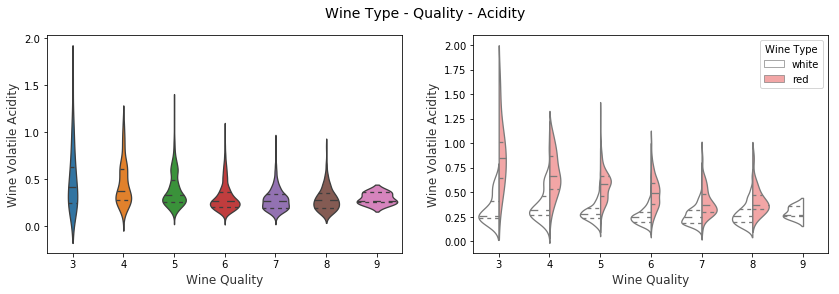

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

#############
# Left Plot #
#############
sns.violinplot(data=wines, 
               x="quality",
               y="volatile acidity",
               inner="quart", linewidth=1.3,
               ax=ax1)

ax1.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size=12,alpha=0.8)

##############
# Right Plot #
##############
sns.violinplot(data=wines,
               x="quality", 
               y="volatile acidity", 
               hue="wine_type", # <== 😀 Look here!
               split=True,      # <== 😀 Look here!
               palette={"red": "#FF9999",  # <== 😀 Look here!
                        "white": "white"}, # <== 😀 Look here!
               inner="quart", linewidth=1.3,
               ax=ax2)

ax2.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size=12,alpha=0.8)
plt.legend(loc='upper right', title='Wine Type')

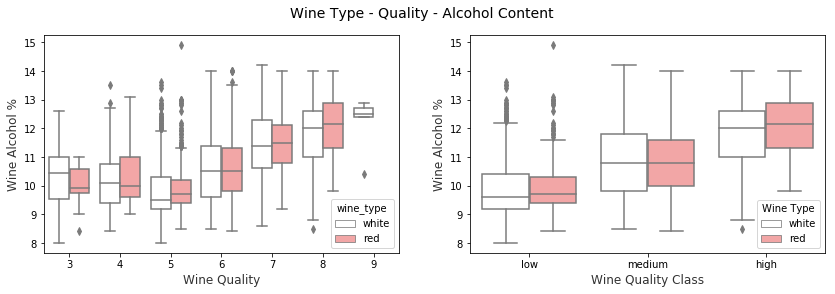

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

#############
# Left Plot #
#############
sns.boxplot(data=wines, 
            x="quality",
            y="alcohol", 
            hue="wine_type", # <== 😀 Look here!
            palette={"red": "#FF9999",  # <== 😀 Look here!
                     "white": "white"}, # <== 😀 Look here!
            ax=ax1)

ax1.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)

##############
# Right Plot #
##############
sns.boxplot(data=wines, 
            x="quality_label",
            y="alcohol", 
            hue="wine_type", # <== 😀 Look here!
            palette={"red": "#FF9999",  # <== 😀 Look here!
                     "white": "white"}, # <== 😀 Look here!
            ax=ax2)

ax2.set_xlabel("Wine Quality Class",size=12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)
plt.legend(loc='best', title='Wine Type')


# 4D: Visualizing Data in Four Dimensions

### Factors:

    1.  X-axis
    2.  Y-axis
    3.  Size
    4.  Color


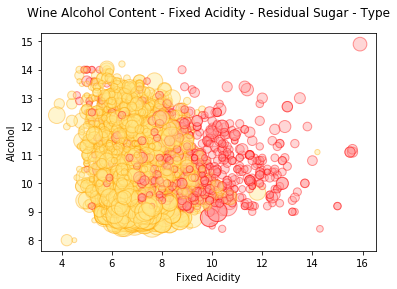

In [54]:
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], # <== 😀 1st DIMENSION
            wines['alcohol'],       # <== 😀 2nd DIMENSION
            s=size,                 # <== 😀 3rd DIMENSION
            color=fill_colors,      # <== 😀 4th DIMENSION             
            edgecolors=edge_colors,
            alpha=0.4)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)

### Factors:

   1. X-axis
   2. Y-axis
   3. Color
   4. n-Columns ← 😀


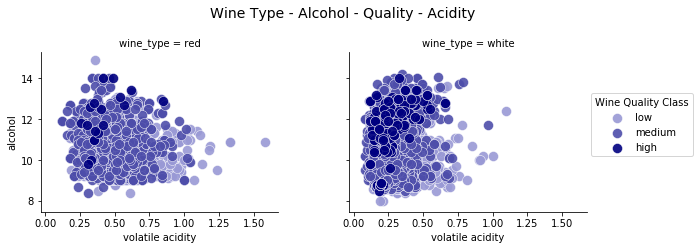

In [55]:
g = sns.FacetGrid(wines, 
                  col="wine_type",            # 😀 TWO COLUMNS coz there're TWO "wine types"
                  col_order=['red', 'white'], # -> Specify the labels
                  hue='quality_label',        # ADD COLOR
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.2, 
                  size=3.5, 
                  palette=sns.light_palette('navy', 4)[1:])

g.map(plt.scatter, 
      "volatile acidity", # <== x-axis
      "alcohol",          # <== y-axis
      alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
g.add_legend(title='Wine Quality Class')

### Factors:

   1. X-axis
   2. Y-axis
   3. Color
   4. n-Columns ← 😀

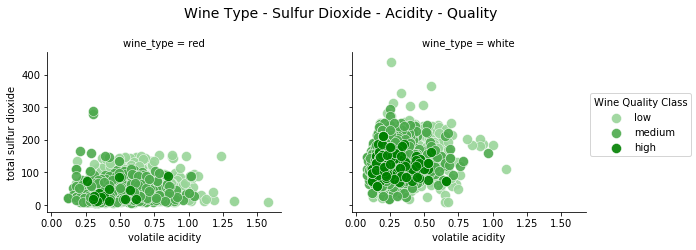

In [56]:
g = sns.FacetGrid(wines, 
                  col="wine_type",            # 😀 TWO COLUMNS coz there're TWO "wine types"
                  col_order=['red', 'white'], # -> Specify the labels
                  hue='quality_label',        # ADD COLOR
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.2, 
                  size=3.5, 
                  palette=sns.light_palette('green', 4)[1:])

g.map(plt.scatter, 
      "volatile acidity",     # <== x-axis
      "total sulfur dioxide", # <== y-axis
      alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Acidity - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class')

# 5D: Visualizing Data in Five Dimensions

### Factors:

   1. X-axis
   2. Y-axis
   3. Color
   4. n-Columns
   5. Size ← 😀


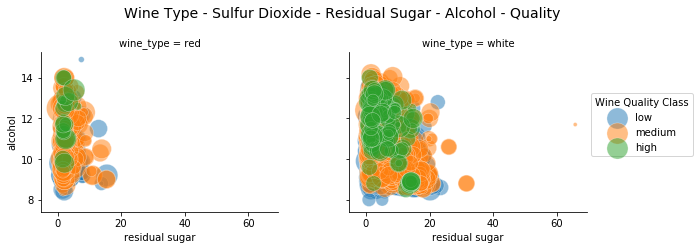

In [57]:
g = sns.FacetGrid(wines, 
                  col="wine_type",            # TWO COLUMNS coz there're TWO "wine types"
                  col_order=['red', 'white'], # -> Specify the labels
                  hue='quality_label',        # ADD COLOR
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.2, 
                  size=3.5)

g.map(plt.scatter, 
      "residual sugar", # <== x-axis
      "alcohol",        # <== y-axis
      alpha=0.5, 
      edgecolor='white', 
      linewidth=0.5, 
      s=wines['total sulfur dioxide']*2) # <== 😀 Adjust the size

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class')

# 6D: Visualizing Data in Six Dimensions

### Factors:

   1. X-axis
   2. Y-axis
   3. Color
   4. n-Columns
   5. Size
   6. m-Rows ← 😀


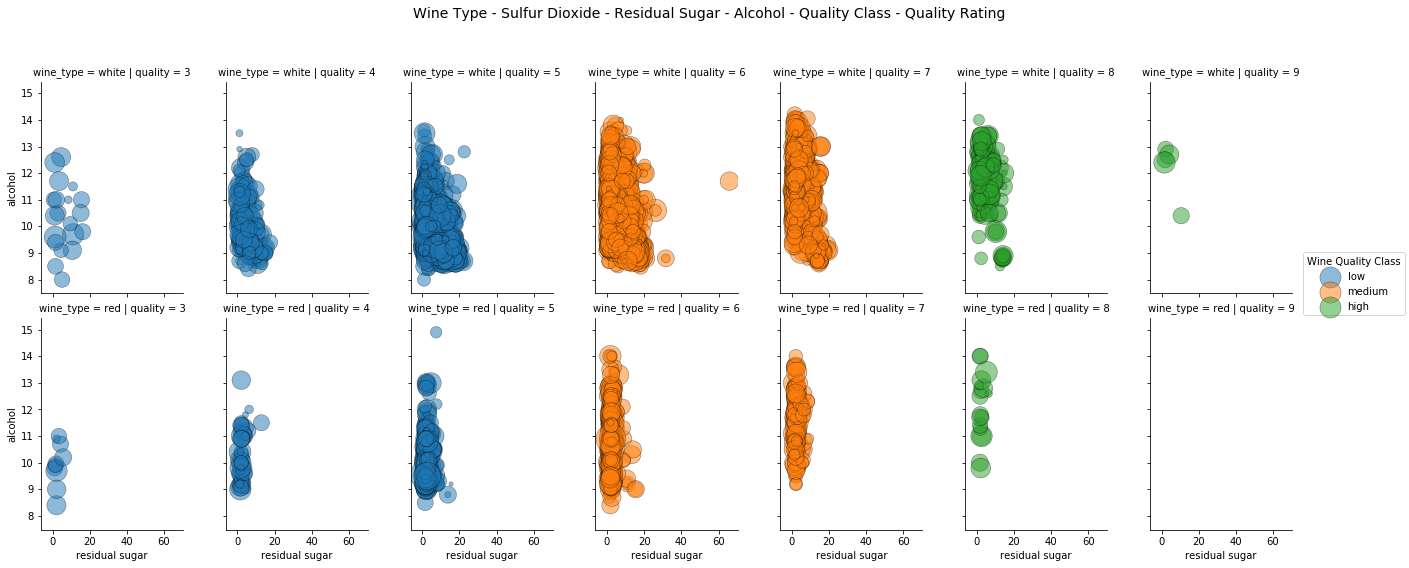

In [58]:
g = sns.FacetGrid(wines, 
                  row='wine_type',     # <== 1) 😀 ROW
                  col="quality",       # <== 2) 😀 COLUMN
                  hue='quality_label', # <== 3) 😀 COLOR
                  size=4)

g.map(plt.scatter,  
      "residual sugar", # <== 4) 😀 x-axis
      "alcohol",        # <== 5) 😀 y-axis
      alpha=0.5, 
      edgecolor='k', 
      linewidth=0.5, 
      s=wines['total sulfur dioxide']*2) # <== 6) 😀 Size

fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
g.add_legend(title='Wine Quality Class')